在沙盒环境下，通过技术骨架点分析

In [1]:
import os, copy, sys, itertools
os.environ['ULTRON_DATA'] = 'keim'
os.environ['IGNORE_WARNINGS'] = '0'
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from ultron.ump.technical.line import Line, ESkeletonHow, K_PLT_MAP_STYLE

/var/log/ultron/2022-10-03.log


In [3]:
from ultron.env import *

In [4]:
enable_example_env()

2022-10-03 20:26:45,085 - [env.py:81] - ultron - INFO - enable example env will only read /home/kerry/ultron/rom/sandbox/keim


#### 加载行情

In [5]:
market_data = pd.read_csv(os.path.join(g_project_data, 'market_data.csv'), index_col=0)
market_data['trade_date'] = pd.to_datetime(market_data['trade_date'])
market_data = market_data.set_index('code').loc['RB']#[['trade_date','closePrice']]
market_data = market_data.rename(columns={
    'closePrice':'close','openPrice':'open',
    'highestPrice':'high','lowestPrice':'low',
    'turnoverVol':'volume'})
market_data['date'] = pd.to_datetime(market_data['trade_date']).dt.strftime('%Y%m%d').astype(int)
market_data = market_data.set_index('trade_date')
market_data.head()

,open,high,low,close,volume,date
trade_date,,,,,,
2017-10-27,2060.3185,2068.7855,2012.3384,2019.1121,2991008,20171027
2017-10-30,2021.3700,2047.9001,2010.0806,2015.7253,2092610,20171030
2017-10-31,2017.9831,2068.7855,1995.4043,2047.9001,3080286,20171031
2017-11-01,2051.2869,2064.2698,2010.0806,2011.2095,2340156,20171101
2017-11-02,2020.8055,2077.2526,2006.6937,2055.8027,2629562,20171102


In [6]:
kl_tl = Line(market_data['close'][-252:], 'close')

##### 骨架通道点位值

In [7]:
min_res, max_res, mean_res = kl_tl.create_skeleton_channel()

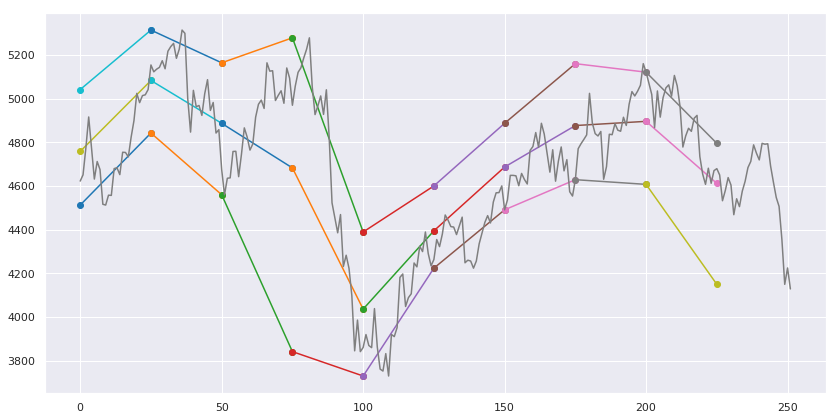

In [8]:
plt.figure(figsize=(14, 7))
for res in min_res:
    last_pos = res['last_pos']
    draw_pos = res['draw_pos']
    if last_pos is not None:
        plt.plot([last_pos[0], draw_pos[0]],
                             [last_pos[1], draw_pos[1]], 'o-')
for res in max_res:
    last_pos = res['last_pos']
    draw_pos = res['draw_pos']
    if last_pos is not None:
        plt.plot([last_pos[0], draw_pos[0]],
                             [last_pos[1], draw_pos[1]], 'o-')

for res in mean_res:
    last_pos = res['last_pos']
    draw_pos = res['draw_pos']
    if last_pos is not None:
        plt.plot([last_pos[0], draw_pos[0]],
                             [last_pos[1], draw_pos[1]], 'o-')
plt.plot(kl_tl.tl)
plt.show()

#### 三角骨架点位值

In [9]:
triangle_res = kl_tl.create_skeleton(ESkeletonHow.skeleton_triangle)

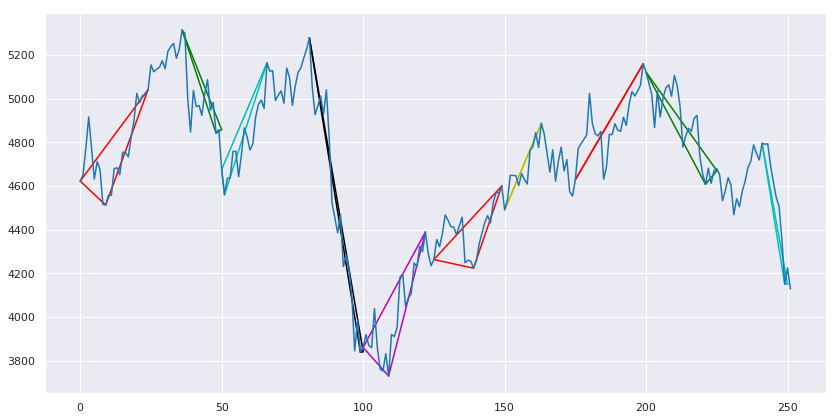

In [10]:
plt.figure(figsize=(14, 7))

for res,color in zip(triangle_res,itertools.cycle(K_PLT_MAP_STYLE)):
    min_pos = res['min_pos']
    max_pos = res['max_pos']
    draw_pos = res['draw_pos']
    plt.plot([draw_pos[0], min_pos[0]], [draw_pos[1], min_pos[1]],
                         c=color)

    plt.plot([draw_pos[0], max_pos[0]], [draw_pos[1], max_pos[1]],
                         c=color)

    plt.plot([min_pos[0], max_pos[0]], [min_pos[1], max_pos[1]],
                         c=color)
plt.plot(kl_tl.tl)
plt.show()

##### 最小值骨架点位值

In [11]:
min_res = kl_tl.create_skeleton(ESkeletonHow.skeleton_min)

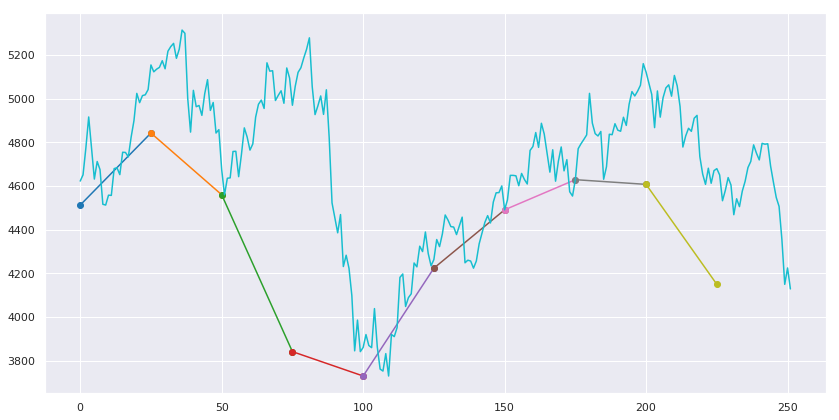

In [12]:
plt.figure(figsize=(14, 7))
for res in min_res:
    last_pos = res['last_pos']
    draw_pos = res['draw_pos']
    if last_pos is not None:
        plt.plot([last_pos[0], draw_pos[0]],
                             [last_pos[1], draw_pos[1]], 'o-')
plt.plot(kl_tl.tl)
plt.show()

##### 平均值骨架点位值

In [13]:
mean_res = kl_tl.create_skeleton(ESkeletonHow.skeleton_mean)

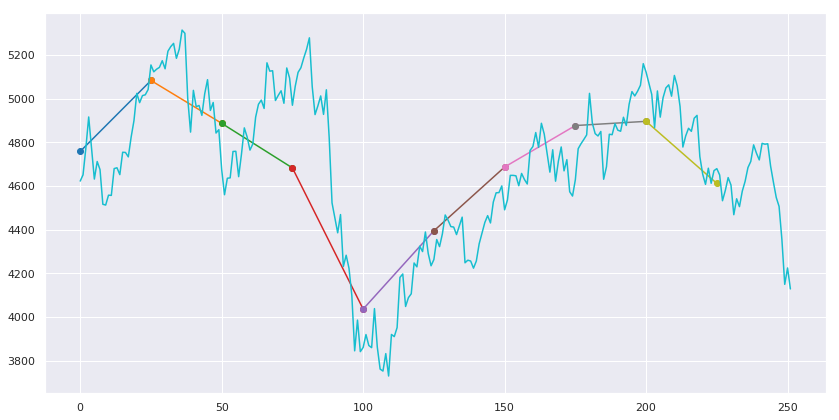

In [14]:
plt.figure(figsize=(14, 7))
for res in mean_res:
    last_pos = res['last_pos']
    draw_pos = res['draw_pos']
    if last_pos is not None:
        plt.plot([last_pos[0], draw_pos[0]],
                             [last_pos[1], draw_pos[1]], 'o-')
plt.plot(kl_tl.tl)
plt.show()

##### 最大值骨架点位值

In [15]:
max_res = kl_tl.create_skeleton(ESkeletonHow.skeleton_max)

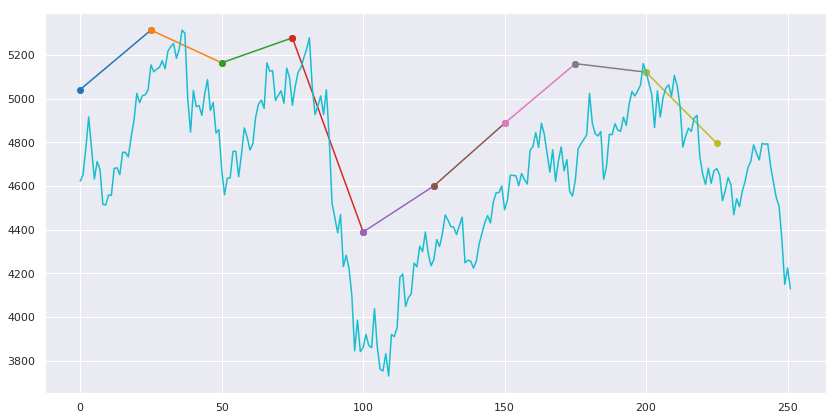

In [16]:
plt.figure(figsize=(14, 7))
for res in max_res:
    last_pos = res['last_pos']
    draw_pos = res['draw_pos']
    if last_pos is not None:
        plt.plot([last_pos[0], draw_pos[0]],
                             [last_pos[1], draw_pos[1]], 'o-')
plt.plot(kl_tl.tl)
plt.show()

##### 中位数骨架点位值

In [17]:
median_res = kl_tl.create_skeleton(ESkeletonHow.skeleton_median)

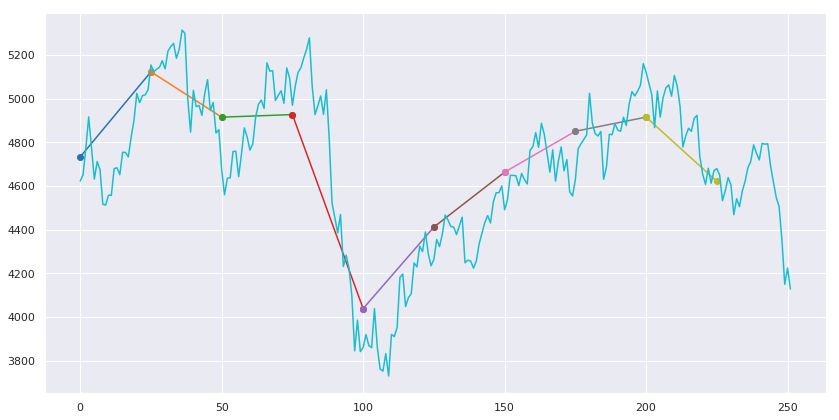

In [18]:
plt.figure(figsize=(14, 7))
for res in median_res:
    last_pos = res['last_pos']
    draw_pos = res['draw_pos']
    if last_pos is not None:
        plt.plot([last_pos[0], draw_pos[0]],
                             [last_pos[1], draw_pos[1]], 'o-')
plt.plot(kl_tl.tl)
plt.show()

##### 最后数骨架点位值

In [19]:
close_res = kl_tl.create_skeleton(ESkeletonHow.skeleton_close)

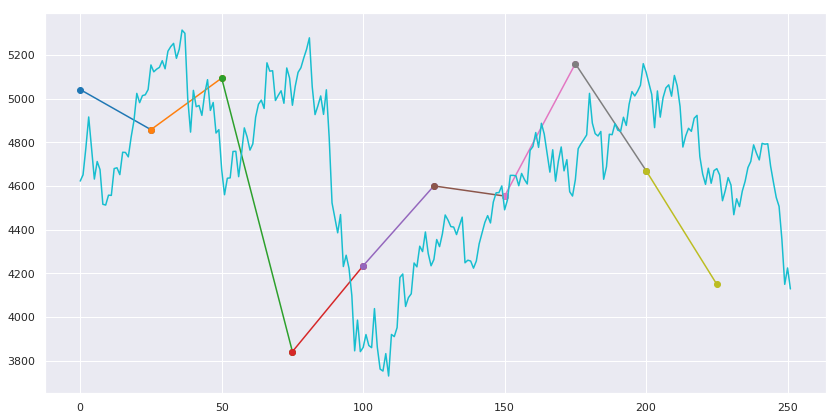

In [20]:
plt.figure(figsize=(14, 7))
for res in close_res:
    last_pos = res['last_pos']
    draw_pos = res['draw_pos']
    if last_pos is not None:
        plt.plot([last_pos[0], draw_pos[0]],
                             [last_pos[1], draw_pos[1]], 'o-')
plt.plot(kl_tl.tl)
plt.show()